In [199]:
import pandas as pd
import numpy as np
from ast import literal_eval

In [26]:
# Predict df
df_pred = pd.read_csv('predictions.csv')
df_pred = df_pred[df_pred.columns[1:]] # Remove column: "Unnamed: 0"

# Split the string array into columns 'idx_*'
new_predictions = []
for idx, row in df_pred.iterrows():
    arr = literal_eval(row['predictions'].replace('\n', ','))
    d = {'idx_' + str(idx):x[0] for idx, x in enumerate(arr)}
    d['index'] = idx
    new_predictions.append(d)

# Join the 'idx_*' columns with df
df_2 = pd.DataFrame(new_predictions)
df = df_pred.join(df_2)
df = df[df.columns[:-1]] # Remove unnecessary index

In [7]:
col_probs = [x for x in df.columns if 'idx_' in x]

In [99]:
# Add mean and max columns
df['mean'] = df[col_probs].mean(axis=1)
df['max'] = df[col_probs].max(axis=1)
df['std'] = df[col_probs].std(axis=1)

In [100]:
df

,path,annotation,predictions,idx_0,idx_1,idx_2,idx_3,idx_4,idx_5,idx_6,idx_7,idx_8,idx_9,mean,max,std
0,../deepfake_train_full\dfdc_train_part_45\dfdc...,FAKE,[[3.5265051e-03]\n [3.0813090e-04]\n [5.886242...,3.526505e-03,3.081309e-04,5.886243e-07,7.620351e-01,9.460791e-03,9.917978e-01,5.767963e-03,5.711840e-01,5.038002e-02,9.682453e-03,2.404143e-01,9.917978e-01,3.823012e-01
1,../deepfake_train_full\dfdc_train_part_45\dfdc...,REAL,[[5.8379888e-09]\n [7.9770279e-09]\n [8.329672...,5.837989e-09,7.977028e-09,8.329672e-10,7.284967e-08,1.048334e-09,1.857281e-05,4.091373e-06,1.767048e-07,8.640434e-06,2.559106e-07,3.182578e-06,1.857281e-05,6.102458e-06
2,../deepfake_train_full\dfdc_train_part_45\dfdc...,FAKE,[[1.6838417e-08]\n [1.0031427e-07]\n [1.951372...,1.683842e-08,1.003143e-07,1.951373e-08,2.371918e-07,2.939314e-08,9.288438e-09,3.840892e-08,4.499417e-08,8.906171e-08,8.732678e-08,6.723314e-08,2.371918e-07,6.814379e-08
3,../deepfake_train_full\dfdc_train_part_45\dfdc...,REAL,[[8.8938551e-10]\n [1.4731814e-08]\n [1.667182...,8.893855e-10,1.473181e-08,1.667182e-08,1.528423e-07,1.299510e-08,6.636372e-10,9.088133e-09,7.997305e-09,1.020815e-08,4.842430e-09,2.309301e-08,1.528423e-07,4.590713e-08
4,../deepfake_train_full\dfdc_train_part_45\dfdc...,FAKE,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364,../deepfake_train_full\dfdc_train_part_48\dfdc...,FAKE,[[2.5187552e-01]\n [4.5120154e-04]\n [2.207254...,2.518755e-01,4.512015e-04,2.207254e-04,4.435138e-04,4.268513e-04,8.939055e-04,2.637182e-03,4.462444e-05,9.684254e-03,2.919674e-04,2.669697e-02,2.518755e-01,7.917368e-02
13365,../deepfake_train_full\dfdc_train_part_48\dfdc...,REAL,[[5.6307060e-01]\n [2.5973301e-05]\n [1.557213...,5.630706e-01,2.597330e-05,1.557214e-03,8.356873e-04,2.083818e-03,5.511399e-04,8.146752e-04,9.282292e-04,1.633087e-03,2.126001e-03,5.736264e-02,5.630706e-01,1.776889e-01
13366,../deepfake_train_full\dfdc_train_part_48\dfdc...,FAKE,[[1.3763700e-03]\n [8.6559319e-01]\n [9.874792...,1.376370e-03,8.655932e-01,9.874793e-01,9.164143e-01,2.825730e-06,1.791343e-04,5.000479e-04,1.275874e-01,3.877553e-06,9.782170e-01,3.877353e-01,9.874793e-01,4.753927e-01
13367,../deepfake_train_full\dfdc_train_part_48\dfdc...,REAL,[[4.48190107e-08]\n [1.36630842e-03]\n [7.9808...,4.481901e-08,1.366308e-03,7.980809e-01,3.295229e-04,3.179362e-06,1.765153e-04,1.381531e-06,1.155194e-07,6.173848e-06,4.508075e-02,8.450449e-02,7.980809e-01,2.511213e-01


In [10]:
df.groupby('annotation')['max'].mean()

annotation
FAKE    0.588933
REAL    0.456032
Name: max, dtype: float64

In [11]:
df.groupby('annotation')['mean'].mean()

annotation
FAKE    0.419042
REAL    0.298746
Name: mean, dtype: float64

In [12]:
df.groupby('annotation')['mean'].std()

annotation
FAKE    0.424146
REAL    0.392878
Name: mean, dtype: float64

In [13]:
df.groupby('annotation')['max'].std()

annotation
FAKE    0.467837
REAL    0.473068
Name: max, dtype: float64

In [14]:
max_prob = df[df['annotation'] == 'REAL']['max'].max()

# Measure current results

In [315]:
df_temp = df[['annotation', 'mean', 'max', 'std']]

In [316]:
df_temp['annotation'] = df_temp['annotation'].replace('FAKE', 1).replace('REAL', 0)

C:\Users\Anti\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [317]:
df_temp = df_temp.fillna(0.5)

In [318]:
df_temp

,annotation,mean,max,std
0,1,2.404143e-01,9.917978e-01,3.823012e-01
1,0,3.182578e-06,1.857281e-05,6.102458e-06
2,1,6.723314e-08,2.371918e-07,6.814379e-08
3,0,2.309301e-08,1.528423e-07,4.590713e-08
4,1,5.000000e-01,5.000000e-01,5.000000e-01
...,...,...,...,...
13364,1,2.669697e-02,2.518755e-01,7.917368e-02
13365,0,5.736264e-02,5.630706e-01,1.776889e-01
13366,1,3.877353e-01,9.874793e-01,4.753927e-01
13367,0,8.450449e-02,7.980809e-01,2.511213e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017702083E80>,
      dtype=object)

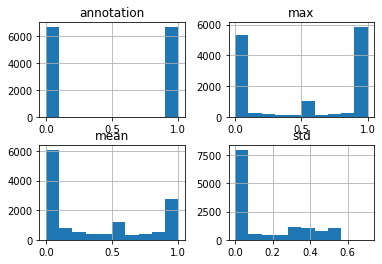

In [319]:
df_temp.hist()

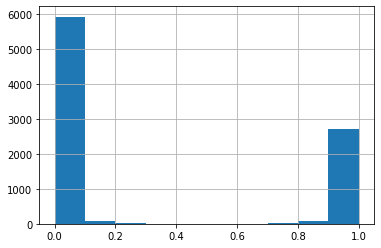

In [320]:
df_temp[df_temp['std'] < 0.2]['mean'].hist()

In [321]:
df_temp_2 = df_temp[df_temp['std'] < 0.2]

In [312]:
y = df_temp_2['annotation']
yu = df_temp_2['mean']

In [ ]:
def calculate_loss(true, pred):
    y = true
    yu = pred

In [322]:
y = df_temp['annotation']
yu = df_temp['mean']

In [327]:
import sklearn

In [328]:
sklearn.metrics.log_loss(df_temp['annotation'], df_temp['mean'])

2.688387298052754

C:\Users\Anti\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


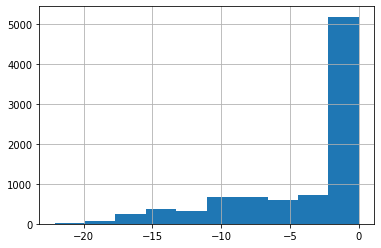

In [326]:
y = df_temp_2['annotation']
yu = df_temp_2['mean']
df_temp_2['loss'] = (y*np.log(yu) + (1-y)*np.log(1-yu))
df_temp_2['loss'].hist()

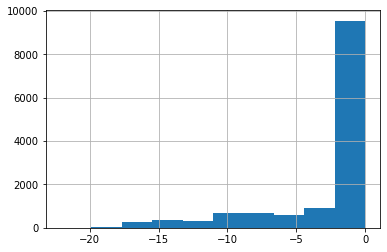

In [325]:
df_temp['loss'] = (y*np.log(yu) + (1-y)*np.log(1-yu))
df_temp['loss'].hist()

In [276]:
df_temp['loss'].mean()

-2.688387298052754

In [263]:
np.sum((y*np.log(yu) + (1-y)*np.log(1-yu)))*(-(1/len(df_temp)))

2.6883872980527537

In [248]:
np.log(1-yu)

0       -2.749822e-01
1       -3.182583e-06
2       -6.723314e-08
3       -2.309301e-08
4       -6.931472e-01
             ...     
13364   -2.705981e-02
13365   -5.907363e-02
13366   -4.905906e-01
13367   -8.828982e-02
13368   -1.258224e-04
Name: mean, Length: 13369, dtype: float64

In [45]:
df[df['path'].str.contains('dfdc_train_part_47')].index[0]

7454

# LightGBM

In [88]:
import lightgbm as lgb

In [98]:
col_probs + ['mean','max', 'std']

['idx_0',
 'idx_1',
 'idx_2',
 'idx_3',
 'idx_4',
 'idx_5',
 'idx_6',
 'idx_7',
 'idx_8',
 'idx_9',
 'mean']

In [303]:
# data_x = df[col_probs + ['mean','max', 'std']].fillna(-1).values
data_x = df[['mean','max', 'std']].fillna(-1).values
data_y = df['annotation'].replace('FAKE', 1).replace('REAL', 0).values

In [304]:
# Train val split
split_idx = df[df['path'].str.contains('dfdc_train_part_47')].index[0]
train_x = data_x[:split_idx]
train_y = data_y[:split_idx]
val_x = data_x[split_idx:]
val_y = data_y[split_idx:]

In [305]:
# Increase training data size
copy_train_x = np.copy(train_x)
copy_train_y = np.copy(train_y)
# for i in range(10):
#     print(i)
#     seed = random.randint(0, 10000)
#     for i in range(len(copy_train_x)):
#         random.shuffle(copy_train_x[i])
# #     random.seed(seed)
# #     random.shuffle(copy_train_x)
# #     random.seed(seed)
# #     random.shuffle(copy_train_y)
    
# #     temp_x = np.concatenate((train_x, copy_train_x))
# #     temp_y = np.concatenate((train_y, copy_train_y))
#     train_x = np.concatenate((train_x, copy_train_x))
#     train_y = np.concatenate((train_y, copy_train_y))

In [306]:
copy_train_x[i]

array([1.23952374e-07, 7.61817720e-07, 2.34536270e-07])

In [308]:
pd.DataFrame(train_x)

,0,1,2
0,2.404143e-01,9.917978e-01,3.823012e-01
1,3.182578e-06,1.857281e-05,6.102458e-06
2,6.723314e-08,2.371918e-07,6.814379e-08
3,2.309301e-08,1.528423e-07,4.590713e-08
4,-1.000000e+00,-1.000000e+00,-1.000000e+00
...,...,...,...
7449,6.190193e-08,4.135120e-07,1.273721e-07
7450,2.178967e-08,1.488973e-07,4.607911e-08
7451,5.732998e-08,1.782345e-07,6.442794e-08
7452,7.769878e-08,4.656225e-07,1.473684e-07


In [309]:
train_y

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [294]:
train_data = lgb.Dataset(train_x, label=train_y)
val_data = lgb.Dataset(val_x, label=val_y)

In [300]:
num_round = 50
param = {'num_leaves': 4, 
         'objective': 'binary', 
#          'tree_learner': 'serial', 
#          'tree_learner_type':'serial', 
#          'max_depth': 5,
         'feature_fraction': 1,
#          'extra_trees': 50,
#          'min_data_in_leaf': 70,
#          'min_sum_hessian_in_leaf': 1e-8
        }
param['metric'] = 'binary'
bst = lgb.train(param, train_data, num_round, valid_sets=[train_data, val_data])

[1]	training's binary_logloss: 0.689463	valid_1's binary_logloss: 0.691107
[2]	training's binary_logloss: 0.686152	valid_1's binary_logloss: 0.689373
[3]	training's binary_logloss: 0.683592	valid_1's binary_logloss: 0.688122
[4]	training's binary_logloss: 0.681175	valid_1's binary_logloss: 0.687517
[5]	training's binary_logloss: 0.679383	valid_1's binary_logloss: 0.686729
[6]	training's binary_logloss: 0.677522	valid_1's binary_logloss: 0.686266
[7]	training's binary_logloss: 0.676196	valid_1's binary_logloss: 0.685875
[8]	training's binary_logloss: 0.674812	valid_1's binary_logloss: 0.685788
[9]	training's binary_logloss: 0.673769	valid_1's binary_logloss: 0.685263
[10]	training's binary_logloss: 0.672718	valid_1's binary_logloss: 0.685054
[11]	training's binary_logloss: 0.671762	valid_1's binary_logloss: 0.68594
[12]	training's binary_logloss: 0.670875	valid_1's binary_logloss: 0.685777
[13]	training's binary_logloss: 0.670065	valid_1's binary_logloss: 0.686763
[14]	training's binary

In [197]:
num_round = 50
param = {'num_leaves': 3, 
         'objective': 'binary', 
#          'tree_learner': 'serial', 
#          'tree_learner_type':'serial', 
#          'max_depth': 5,
         'feature_fraction': 1,
#          'extra_trees': 50,
         'min_data_in_leaf': 70,
         'min_sum_hessian_in_leaf': 1e-8
        }
param['metric'] = 'binary'
bst = lgb.train(param, train_data, num_round, valid_sets=[val_data])

[1]	valid_0's binary_logloss: 0.691387
[2]	valid_0's binary_logloss: 0.689708
[3]	valid_0's binary_logloss: 0.68896
[4]	valid_0's binary_logloss: 0.68799
[5]	valid_0's binary_logloss: 0.687395
[6]	valid_0's binary_logloss: 0.686636
[7]	valid_0's binary_logloss: 0.686336
[8]	valid_0's binary_logloss: 0.685596
[9]	valid_0's binary_logloss: 0.685261
[10]	valid_0's binary_logloss: 0.684784
[11]	valid_0's binary_logloss: 0.684601
[12]	valid_0's binary_logloss: 0.683925
[13]	valid_0's binary_logloss: 0.683816
[14]	valid_0's binary_logloss: 0.683429
[15]	valid_0's binary_logloss: 0.683281
[16]	valid_0's binary_logloss: 0.683259
[17]	valid_0's binary_logloss: 0.683121
[18]	valid_0's binary_logloss: 0.682598
[19]	valid_0's binary_logloss: 0.682675
[20]	valid_0's binary_logloss: 0.68259
[21]	valid_0's binary_logloss: 0.682178
[22]	valid_0's binary_logloss: 0.682022
[23]	valid_0's binary_logloss: 0.681943
[24]	valid_0's binary_logloss: 0.681916
[25]	valid_0's binary_logloss: 0.681557
[26]	valid_0

In [35]:
data_y

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [83]:
def generator(x, y, batch_size=16):
    assert len(x) == len(y)
    while True:
        idx = [random.randrange(0, len(y), 1) for x in range(batch_size)]
        X = x[idx]
        print(len(X))
        Y = y[idx]
        seed = random.randint(0, 10000)
        random.seed(seed)
        random.shuffle(X)
        random.seed(seed)
        random.shuffle(Y)
        
        print(len(X))
        
        yield (X,Y)

In [84]:
for x, y in generator(train_x, train_y):
    break

16
16


In [85]:
x

array([[ 9.9989460e-01,  9.9976950e-01,  9.9986270e-01,  9.9968030e-01,
         9.9988100e-01,  9.9941635e-01,  9.9990260e-01,  9.9973270e-01,
         9.9987364e-01,  9.9982870e-01],
       [ 9.9989460e-01,  9.9976950e-01,  9.9986270e-01,  9.9968030e-01,
         9.9988100e-01,  9.9941635e-01,  9.9990260e-01,  9.9973270e-01,
         9.9987364e-01,  9.9982870e-01],
       [ 1.5153906e-04,  1.4891996e-04,  1.6024345e-04,  6.5257831e-05,
         1.3059237e-04,  1.3209638e-04,  1.0105080e-04,  3.9629780e-05,
         3.1746193e-05,  3.0909014e-05],
       [ 4.9731204e-01,  1.8505410e-01,  1.2821124e-01,  1.0611197e-01,
         7.8165650e-02,  1.8989880e-02,  5.7844880e-02,  1.0104400e-02,
         4.1804800e-03, -1.0000000e+00],
       [ 1.5153906e-04,  1.4891996e-04,  1.6024345e-04,  6.5257831e-05,
         1.3059237e-04,  1.3209638e-04,  1.0105080e-04,  3.9629780e-05,
         3.1746193e-05,  3.0909014e-05],
       [ 9.9928147e-01,  9.9963560e-01,  9.9931660e-01,  9.9932003e-01,
   

In [86]:
y

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [52]:
import random

In [54]:
random.choices(train_x, k=4)

[array([ 9.4251311e-01,  4.1341351e-05,  1.3783807e-05,  5.3508065e-05,
         8.7021693e-04,  1.9094761e-05,  2.1192658e-08,  5.8930099e-02,
         1.3040159e-07, -1.0000000e+00]),
 array([0.9995709 , 0.99984705, 0.9994122 , 0.9996532 , 0.9994568 ,
        0.9994143 , 0.9993012 , 0.9995364 , 0.99950576, 0.999874  ]),
 array([ 9.9885607e-01,  9.9883026e-01,  9.8502827e-01,  9.9959630e-01,
         9.9741274e-01,  9.9877959e-01,  6.9176441e-01,  9.9965644e-01,
         8.5896277e-04, -1.0000000e+00]),
 array([ 3.8291063e-02,  2.5308425e-02,  8.0752274e-05,  9.9777514e-01,
         5.7796848e-01,  7.3198326e-02,  5.2726400e-01,  3.2605308e-01,
         2.0390122e-01, -1.0000000e+00])]

In [58]:
for i in random.randrange(0, 100, 1):
    print (str(i))

TypeError: 'int' object is not iterable

In [64]:
[random.randrange(0, 100, 1) for x in range(3)]

[23, 1, 31]

In [70]:
random.seed(42)
random.random()
random.seed(42)
random.random()

0.6394267984578837